**Author**
Sharmila Thirumalainathan, B00823668
Aishwarya Narayanan, B00820313


**Importing required libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


The Zomato dataset was retrieved from Kaggle to forecast the approximate cost of two people in for a restaurant in Bangalore, India based on various input variables with a statistical learning algorithm.  It contains 51717 records and 17 columns. Below is the brief description of each attribute in the dataset.

**Target Variable:** - Approx Cost of two people (Continuous variable)

**Explanatory Variables:** - 

**Discrete variables**: - 
* URL - The zomato link for the restaurant (String)
* Address - The address of the restaurant (String) 
*	Name - Defining name for each restaurant (String)
* online_order - Values of this attribute will be either "Yes" or "no". 
* Specifies whether online ordering is available in that particular hotel. (Boolean)
* book_table - Values of this attribute will be either "Yes" or "no".
* Specifies whether the particular hotel is having the feature of booking a table. (Boolean)
* phone - Phone number for each hotel (Long)
* location - Defines in which area the hotel is located (String)
* rest_type - Uniquely identifies each restaurant type for a hotel. Each restaurant can have * more than one restaurant type (String Array)
* dish_liked - Identifies the dishes which are most liked by people for a hotel. Each restaurant can have more than one dish liked (String Array)
* Cuisines - Describes the cuisine type for each hotel.  Multiple cuisines can exist in each hotel. (comma separated values)
* reviews_list - Provides reviews given for that hotel and the rating. Number of reviews can be more than one for each hotel (Array of tuples)
* menu_item - Specifies the list of menus for each hotel. (Array of string)
* listed_in(type) - Specifies in which restaurant type the hotel is listed under in zomato. It could have been listed in more than one restaurant type (comma separated values)
* listed_in(city) - Specifies in which area of Bangalore the hotel is located. It could have been * listed in more than one neighbourhood based on the distance. (comma separated values)

**Continuous variables: - **

* approx_cost(for two people) - Provides approximate cost of two people for each hotel.
* rate - Identifies the average rating of each hotel. 
* votes - Number of votes obtained for each hotel. 


**Loading the Zomato data**

In [0]:
zomato_data = pd.read_csv('drive/My Drive/Dataset/zomato.csv')


In [0]:
zomato_data.head()

**Dropping null rows and format rate column**

1. Missing data is removed by dropping the rows with null values. 


In [0]:
zomato_data = zomato_data.dropna()

In [0]:
zomato_data['approx_cost(for two people)']=zomato_data['approx_cost(for two people)'].str.replace(",", "").astype(float)

zomato_data = zomato_data[zomato_data['rate'] != 'NEW']   
zomato_data = zomato_data[zomato_data['rate'] != '-']
zomato_data['rate'] = zomato_data['rate'].str.replace("/5","")
zomato_data['rate'] = zomato_data['rate'].astype(str).astype(float)

print(zomato_data.shape)

(23046, 17)


**Neighbourhood with highest Average Rating**

The neighborhood with the highest average rating was "Cunningham Road".  It was achieved by

1. Grouping all the location values and taking the weighted average of rates and votes.  
2. Finding the highest weighted average from all the locations.

The characteristics of the neighbourhood “Cunningham Road” are: - 

In [0]:
def wavg(x):
  try:
    return np.average(x['rate'].astype(str).astype(float),weights=x['votes'].astype(str).astype(float))
  except ZeroDivisionError:
                      return float(x['rate'])

zdata = zomato_data.groupby("location").apply(lambda x: wavg(x))
zdata = zdata.reset_index()
highestavgTuple = zdata.loc[zdata[0].idxmax()]

print(highestavgTuple['location'])
zomato_data.groupby(["location"]).get_group(highestavgTuple['location']).describe(include='all')


**Frequency Distribution for Input Variables**

The dataset was visualized using pyplot of matplot library. All the attributes were plotted against their frequency to infer the significance of each. All the attributes except "approx_cost(for two people)" was not plotted, since it is the target variable which is to be predicted. 

Histogram was chosen for plotting frequency distribution of each attribute. It is because plotting the categorical values as bar chart would ultimately forecast the comparison among each attribute. Whereas with histogram, the underlying distribution of data points and how widely they are distributed can be finely projected. Hence histogram was chosen for visualization of the frequency distribution. 
Since histograms are known for plotting continuous values, all the categorical values in the data are transformed to continuous values through label encoder.  
The attributes which has comma separated values are processed separately to plot multiple values in an instance.


**Observation**

* By plotting frequency distribution for all the features, the attributes name, URL, address and phone were uniformly distributed, and the x-limit was equal to the number of instances in the dataset. Hence, they were discarded as they had no significance in predicting the class variable.
* The features menu_items and dish_liked were also discarded because on describing those features many empty values were present which would lead to data incompetency.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


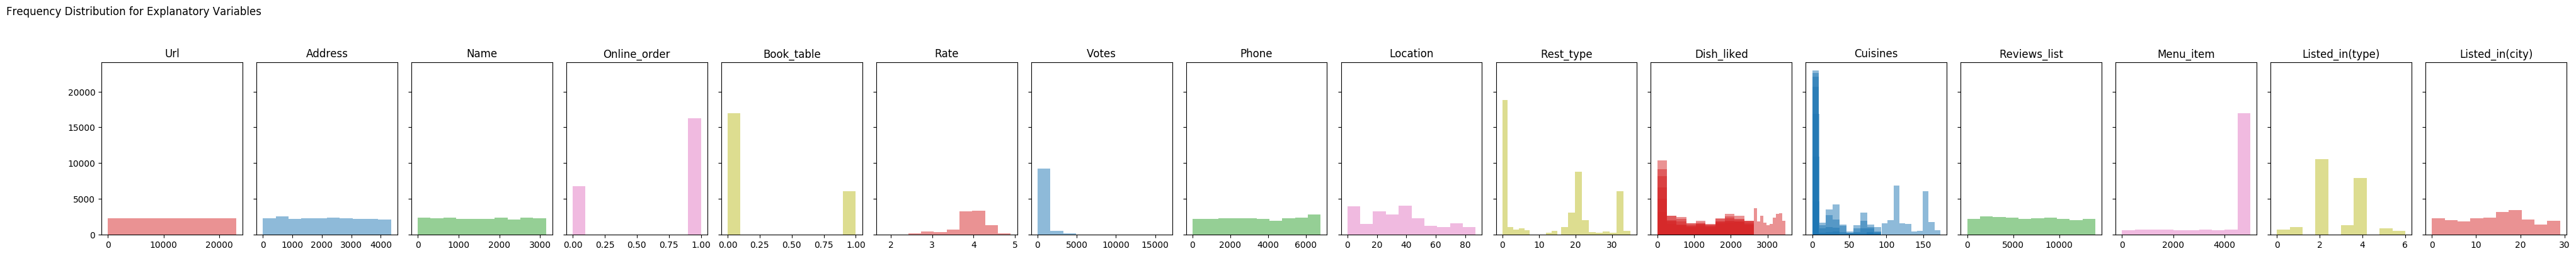

In [0]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

plotData = zomato_data.drop(['approx_cost(for two people)'], axis=1)


fig, axes = plt.subplots(1, len(plotData.columns), figsize=(40,3.5), dpi=100, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']
list_columns=['cuisines', 'rest_type', 'dish_liked']
plotData2 = pd.DataFrame()

for i, (ax, column_name) in enumerate(zip(axes.flatten(), plotData.columns)):
    ax.set_title(column_name.capitalize())
    
    if(column_name in list_columns):
      labels = pd.DataFrame(plotData[column_name].str.split(',').values.tolist()).fillna('')
      le.fit([item for sublist in labels.values for item in sublist])
      labels = pd.DataFrame(np.transpose([le.transform(labels[col]) for col in labels.columns]))
      labels.apply(lambda x: [list(x)])
      x = labels.values.flatten()
      
      for list_column_indx in labels:
        ax.hist(labels[list_column_indx], alpha=0.5, color=colors[i%5])
   
    elif plotData[column_name].dtype == object:
      plotData2[column_name] = le.fit_transform(plotData[column_name])
      x = plotData2.loc[:,column_name]
      ax.hist(x, alpha=0.5,  color=colors[i%5])
    else:
      plotData2[column_name] = plotData[column_name]
      x = plotData2.loc[:,column_name]
      ax.hist(x, alpha=0.5,  color=colors[i%5])
    
    

plt.suptitle('Frequency Distribution for Explanatory Variables', y=1.15, x=0.03)
plt.yscale('linear');
plt.tight_layout();

**Drop columns based on Observation**

In [0]:
zomato_data = zomato_data.drop(["url", "phone", "reviews_list", "menu_item" ,'dish_liked', 'votes'], axis=1)
zomato_data.drop_duplicates(subset = ["name", "address", "listed_in(type)", "listed_in(city)"], inplace=True)


(23005, 11)

**Feature Engineering**


*  On observing the values of the attributes "rest_type" and " listed_in(type)" the values were identical but with different inflectional endings. Hence in order to transform to their root word while preserving the data significance, lemmatization was performed. By doing this, the number of columns was reduced after encoding. 
* From the inference in the number of duplicates in the dataset,the records which had the same name and address values but different listed _in(type) and listed_in(city) values were merged into a single row. It was achieved by joining different listed _in(type) and listed_in(city) values with identical names and address records as comma-separated values.




In [0]:
a = zomato_data[zomato_data.duplicated(subset = ["name", "address", "location"], keep=False)].groupby(['name', 'address', 'location'], as_index=False).agg({
                 'online_order': 'first',
                 'book_table': 'first',
                 'rate': 'first',
                 'rest_type': 'first',
                 'cuisines': 'first',
                 'approx_cost(for two people)': 'first',
                 'listed_in(type)': ','.join,
                'listed_in(city)': ','.join
               })
dataFrame = zomato_data.drop_duplicates(subset = ["name", "address", "location"], keep=False, inplace=False)
df_row_reindex = pd.concat([dataFrame, a], ignore_index=True)

print(df_row_reindex.shape)

(4588, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [0]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

df_row_reindex['listed_in(type)'] = df_row_reindex['listed_in(type)'].apply(lambda x: list(set([ps.stem(word) for word in x.split(",")])))
df_row_reindex['rest_type'] = df_row_reindex['rest_type'].apply(lambda x: list(set([ps.stem(word) for word in x.split(",")])))

df_row_reindex['location'] = df_row_reindex['location'].apply(lambda x: list(set(x.split(","))))
df_row_reindex['nearby'] = df_row_reindex['listed_in(city)'].apply(lambda x: len(x.split(",")))
df_row_reindex['cuisines'] = df_row_reindex['cuisines'].apply(lambda x: list(set(x.split(","))))
df_row_reindex['resturant_type']=(df_row_reindex['rest_type'] + df_row_reindex['listed_in(type)']).map(set).map(list)

df_row_reindex.reset_index()


xTrain = df_row_reindex.drop(['name', 'address', 'approx_cost(for two people)', 'rest_type', 'listed_in(type)', 'listed_in(city)'], axis = 1)
yTrain = df_row_reindex['approx_cost(for two people)']



**Selected Features**

In [0]:
print(xTrain.columns.values)

['book_table' 'cuisines' 'location' 'online_order' 'rate' 'nearby'
 'resturant_type']


**Scatter Plot to view data shape**

The data was plotted in scatter plot to identify if there is linearity in the data. On visualizing it was observed that the data was scattered throughout and the model could not fit the data well. 

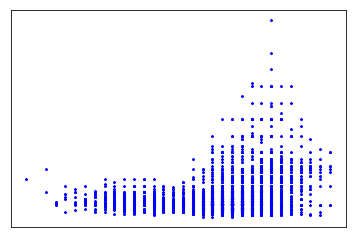

In [0]:
import matplotlib.pyplot as plt
from sklearn import linear_model

lr = linear_model.LinearRegression()
y_pred = lr.predict(test)

plt.figure()
plt.scatter(xTrain['rate'], yTrain,  color='b',s=5,marker='*')
plt.xticks(())
plt.yticks(())
plt.show()

**Model Type**

  It is a supervised learning approach as the data is labeled. As we need to predict continuous variable (approx_cost(for two people)),it is a regression problem.  

**Encoding text-based categorical columns**


 As the categorical text data cannot be fed into the model, it has to be encoded to model-understandable numerical data which was achieved through label encoding. But in label encoding, the model will try to interpret some kind of order in it. In order to overcome this, one hot encoding was used in the cases where the instances had one only value and multi hot encoding was used when instances had multiple values.
 
 
 
 **Standardization**
 
 In the given dataset, the features "approximate cost of two people" and "rate" are measured at different scales. In order to normalize them, "StandardScaler" was used from sklearn.


In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer()
mlb = preprocessing.MultiLabelBinarizer()

list_columns=['cuisines', 'resturant_type', 'location', 'listed_in(city)']
boolean_col = ['book_table', 'online_order']
train = pd.DataFrame()

for column_name in xTrain.columns:
  if column_name in list_columns:
    outerlist = []
 
    for values in xTrain[column_name]:
      tuplevalue = tuple(values)
      outerlist.append(tuplevalue)
      
    temp = pd.DataFrame(mlb.fit_transform(outerlist), columns=mlb.classes_, index=xTrain.index)
    train = pd.merge(train, temp, left_index = True, right_index = True)
  elif column_name in boolean_col:
    temp1 = pd.DataFrame(lb.fit_transform(xTrain[column_name]), index=xTrain.index)
    train[column_name] = temp1[temp1.columns[0]]
    
  else:
    train[column_name] = xTrain[column_name] 
    

train = preprocessing.StandardScaler().fit(train).transform(train) 

**Test Train Split**

In [0]:
from sklearn.model_selection import train_test_split

x_Train, x_Test, y_Train, y_Test = train_test_split(train, yTrain, test_size = 0.3, random_state = 45)

print(x_Train)


[[-0.49194926 -0.03618663 -0.02557944 ...  1.58950246 -0.09138735
  -0.1645829 ]
 [-0.49194926 -0.03618663 -0.02557944 ... -0.62912768 -0.09138735
  -0.1645829 ]
 [-0.49194926 -0.03618663 -0.02557944 ... -0.62912768 -0.09138735
  -0.1645829 ]
 ...
 [ 2.03272995 -0.03618663 -0.02557944 ... -0.62912768 -0.09138735
  -0.1645829 ]
 [-0.49194926 -0.03618663 -0.02557944 ...  1.58950246 -0.09138735
  -0.1645829 ]
 [-0.49194926 -0.03618663 -0.02557944 ...  1.58950246 -0.09138735
  -0.1645829 ]]


**Evaluation Metrics**

The evaluation metrics that are used here are
* Mean Absolute Error - It provides absolute error between the predicted values and actual values.
* .Accuracy (in percentage) - A customized function was made to produce MAE values in percentage to have good inference. 
*  R2 Score - The R2 score for regression determines how close the model fits the actual data. 


In [0]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Performance Metrics')
    print('Mean Absolute Error = {:0.4f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R2 Score = {:0.4f}'.format(r2_score(test_labels, predictions)))
    return round(mean_absolute_error(test_labels, predictions),5)

In [0]:
print(x_Train.shape)
print(y_Train.shape)
print(x_Test.shape)
print(y_Test.shape)

(3211, 305)
(3211,)
(1377, 305)
(1377,)


(1377, 1)

**Linear Regression**

In order to gain further insight, the model was evaluated by finding the accuracy and the result was very low as expected. 

In [0]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

test = x_Test[:, np.newaxis, 2]
train = x_Train[:, np.newaxis, 2]

lr.fit(train, y_Train)

scores = cross_val_score(lr, train, y_Train, cv=5)

linear_test_error = evaluate(lr, test, y_Test )
print("\n")
linear_train_error = evaluate(lr, train, y_Train )

print("\n")
# errors = errors.append({'model': 'Linear Regression', 'train_error': linear_train_error, 'test_error': linear_test_error }, ignore_index=True)

Performance Metrics
Mean Absolute Error = 342.8827 .
Accuracy = 30.46%.
R2 Score = -0.0001


Performance Metrics
Mean Absolute Error = 345.9516 .
Accuracy = 26.00%.
R2 Score = 0.0013




**Decision Tree**

As there was non-linearity in data, decision tree regressor would be a simple and ideal model to predict class variables for the given dataset

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=8) 
regression_model.fit(x_Train,y_Train)

scores = cross_val_score(regression_model, x_Train, y_Train, cv=7)


descision_test_error = evaluate(regression_model, x_Test, y_Test)
print("\n")
descision_train_error = evaluate(regression_model, x_Train, y_Train )
print("\n")

Performance Metrics
Mean Absolute Error = 158.0971 .
Accuracy = 74.03%.
R2 Score = 0.7552


Performance Metrics
Mean Absolute Error = 133.4044 .
Accuracy = 76.80%.
R2 Score = 0.8158




**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 45, min_samples_leaf= 2)
rf.fit(x_Train, y_Train)
scores = cross_val_score(rf, x_Train, y_Train, cv=5)

print(scores)
  
rf_test_error = evaluate(rf, x_Test, y_Test)
print("\n")
rf_train_error  = evaluate(rf, x_Train, y_Train)

[0.78332427 0.75078007 0.78893767 0.76712076 0.77661772]
Performance Metrics
Mean Absolute Error = 145.1540 .
Accuracy = 75.97%.
R2 Score = 0.7949


Performance Metrics
Mean Absolute Error = 81.9963 .
Accuracy = 85.50%.
R2 Score = 0.9271


**Random Forest - Overfitting Analysis**

* Pruning:  - Trees have been pruned by specifying values for minimum number of samples and maximum depth to avoid overfitting. 
* Findings: - To ensure that number of estimators doesn’t overfit the data, overfitting graph was plotted with number of estimators against the mean squared error. 

In [0]:
mae_train_arr = []
mae_test_arr = []
iteration = []
for i in range(50):
  rf.fit(x_Train, y_Train)
  ypred = rf.predict(x_Train)
  ypred_test = rf.predict(x_Test)
  mae_train = mean_absolute_error(y_Train, ypred)
  mae_test = mean_absolute_error(y_Test, ypred_test)
  iteration.append(i)
  mae_train_arr.append(mae_train)
  mae_test_arr.append(mae_test)
  print("Itearation: {} Train: {} Test: {}".format(i, mae_train, mae_test))
  rf.n_estimators +=1

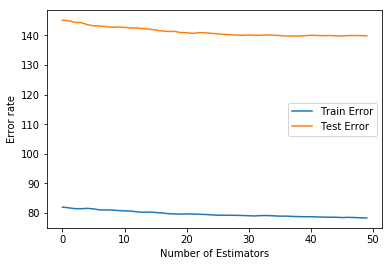

In [0]:

plt.plot(iteration, mae_train_arr, label ="Train Error")
plt.plot(iteration, mae_test_arr, label = "Test Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error rate")
plt.legend()

**Gradient Boosting**

In [0]:
from sklearn import ensemble
params = {
    'n_estimators': 10,
    'learning_rate': 0.3,
    'criterion': 'mse',
    'min_samples_leaf': 2
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x_Train, y_Train)
scores = cross_val_score(gradient_boosting_regressor, x_Train, y_Train, cv=5)


gb_test_error = evaluate(gradient_boosting_regressor, x_Test, y_Test)
print("\n")
gb_train_error = evaluate(gradient_boosting_regressor, x_Train, y_Train)

Performance Metrics
Mean Absolute Error = 168.4502 .
Accuracy = 68.07%.
R2 Score = 0.7473


Performance Metrics
Mean Absolute Error = 166.9432 .
Accuracy = 65.58%.
R2 Score = 0.7849


**XG Boost Regression**

In [0]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.6, learning_rate = 0.5,
                max_depth = 15, alpha = 5, n_estimators = 30)
xg_reg.fit(x_Train,y_Train)

xg_test_error = evaluate(xg_reg, x_Test, y_Test)
print("\n")
xg_train_error = evaluate(xg_reg, x_Train, y_Train)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance Metrics
Mean Absolute Error = 151.8989 .
Accuracy = 74.89%.
R2 Score = 0.7826


Performance Metrics
Mean Absolute Error = 28.1022 .
Accuracy = 94.52%.
R2 Score = 0.9933


In [0]:
params = {'colsample_bytree': 0.6,'learning_rate': 0.5,
                'max_depth': 15, 'alpha': 5}

data_dmatrix = xgb.DMatrix(data=x_Train,label=y_Train)


cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

print(cv_results["train-rmse-mean"].tail)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


<bound method NDFrame.tail of 0    490.214976
1    318.407227
2    219.053386
3    169.151520
4    140.383662
5    123.665296
Name: train-rmse-mean, dtype: float64>


In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.6, learning_rate = 0.3,
                max_depth = 15, alpha = 5, n_estimators = 50)

xg_reg.fit(x_Train,y_Train)

xg_cv_test_error = evaluate(xg_reg, x_Test, y_Test)
print("\n")
xg_cv_train_error = evaluate(xg_reg, x_Train, y_Train)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance Metrics
Mean Absolute Error = 147.7725 .
Accuracy = 75.71%.
R2 Score = 0.7930


Performance Metrics
Mean Absolute Error = 27.7822 .
Accuracy = 94.58%.
R2 Score = 0.9936


**Model Evaluation using Error rate**

From observation, although XG Boosting had less error rate in training data, it was observed that model did not generalize well for unseen data. Whereas with “Random Forest” the error rate was less when comparted with all the other models. Hence “Random Forest” was considered good model for this dataset. 


In [0]:
errors = pd.DataFrame(columns=['model', 'train_error', 'test_error'])
errors.set_index('model')

errors = errors.append({'model': 'Decision Tree Regression', 'train_error': descision_train_error, 'test_error': descision_test_error }, ignore_index=True)
errors = errors.append({'model': 'Random Forest', 'train_error': rf_train_error, 'test_error': rf_test_error }, ignore_index=True)
errors = errors.append({'model': 'Gradient Boosting', 'train_error': gb_train_error, 'test_error': gb_test_error }, ignore_index=True)
errors = errors.append({'model': 'XG-Boosting', 'train_error': xg_train_error, 'test_error': xg_test_error }, ignore_index=True)
errors = errors.append({'model': 'XG-Boosting-After Tunning', 'train_error': xg_cv_train_error, 'test_error': xg_cv_test_error }, ignore_index=True)
print(errors)


                       model  train_error  test_error
0   Decision Tree Regression    133.40441   158.09713
1              Random Forest     81.99630   145.15400
2          Gradient Boosting    166.94317   168.45023
3                XG-Boosting     28.10222   151.89885
4  XG-Boosting-After Tunning     21.84063   148.05546


(5,)


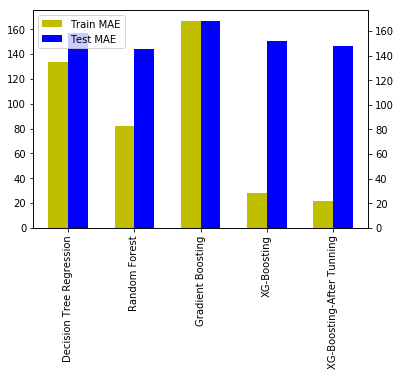

In [0]:
axis1 = plt.subplot(1,1,1)
x = np.arange(5)

w = 0.3
plt.xticks(x + w /2, errors['model'], rotation='vertical')

print(errors['train_error'].shape)

train_axis = axis1.bar(x, errors['train_error'], width=w, color="y",align='center')
axis2 = axis1.twinx()
test_axis =axis2.bar(x + w, errors['test_error'], width=w,color = "b", align='center')

plt.legend([train_axis, test_axis],['Train MAE', 'Test MAE'])
plt.show()



Initially, decision tree technique was chosen to utilize ensembling and boosting with random forest and Gradient Boosting. 
The models that have been implemented are 
•	Decision tree regressor
•	Random forest
•	Gradient Boosting
•	XG Boost

**Evaluation Approach: -**

Cross-validation approach was used to evaluate all the models in order to identify how well the model will generalize on unseen data. All the models were plotted with train errors and test errors in a bar graph. 

**Observations: -**

Although XG Boosting had less error rate in training data, it was observed that model did not generalize well for unseen data. Whereas with “Random Forest” the error rate was less when comparted with all the other models. Hence “Random Forest” was considered good model for this dataset. 


---




**Randomized Grid Search - Performance Tunning**

Initially, hyperparameters were specified manually while training the “RandomForestRegressor” model. In order to further tune it, "RandomizedSearchCV" algorithm was run on random forest regressor to identify best hyperparameters.

In [0]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_Train, y_Train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 30.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=60, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=4...


In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [0]:
rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 2, min_samples_leaf=1, max_features='sqrt')
rf.fit(x_Train, y_Train)
scores = cross_val_score(rf, x_Train, y_Train, cv=5)
  
rf_test_error1 = evaluate(rf, x_Test, y_Test)
print("\n")
rf_train_error1  = evaluate(rf, x_Train, y_Train)

Performance Metrics
Mean Absolute Error = 137.9706 .
Accuracy = 76.07%.
R2 Score = 0.8117


Performance Metrics
Mean Absolute Error = 52.1307 .
Accuracy = 90.30%.
R2 Score = 0.9743


                         model  train_error  test_error
0                Random Forest     81.99630   145.15400
1  Random Forest-AFter Tunning     52.13073   137.97062
(2,)


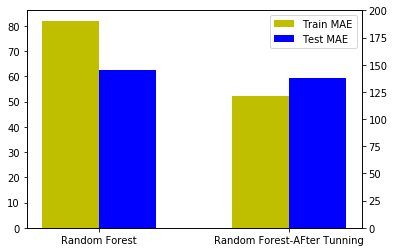

In [0]:
errors = pd.DataFrame(columns=['model', 'train_error', 'test_error'])
errors.set_index('model')

errors = errors.append({'model': 'Random Forest', 'train_error': rf_train_error, 'test_error': rf_test_error }, ignore_index=True)
errors = errors.append({'model': 'Random Forest-AFter Tunning', 'train_error': rf_train_error1, 'test_error': rf_test_error1 }, ignore_index=True)

print(errors)

axis1 = plt.subplot(1,1,1)
x = np.arange(2)

w = 0.3
plt.xticks(x + w /2, errors['model'])

print(errors['train_error'].shape)

train_axis = axis1.bar(x, errors['train_error'], width=w, color="y",align='center')
axis2 = axis1.twinx()
test_axis =axis2.bar(x + w, errors['test_error'], width=w,color = "b", align='center')

plt.legend([train_axis, test_axis],['Train MAE', 'Test MAE'])
plt.ylim(top = 200)
plt.show()

In [0]:
pip install skrebate

In [0]:
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF


clf = make_pipeline(ReliefF(n_features_to_select=100, n_neighbors=100),
                    RandomForestRegressor(n_estimators=400))

print(np.mean(cross_val_score(clf, x_Train, y_Train.values)))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7534392022846301


**RELIEF FEATURE SELECTION**

Random forest regressor will automatically select the best features on its own based on the feature's significance. But in order to specify the maximum number of features to be fed for the model, "Relief feature Algorithm" can be used.

In [0]:
fs = ReliefF()
fs.fit(x_Train, y_Train.values)

ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1,
        n_neighbors=100, verbose=False)